# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**ALBINAH, HLONGO**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [91]:
# Libraries for data loading, data manipulation and data visulisation
# Data Loading, Data Manipulation, Data visulisation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data preparation and Data model building

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [92]:
file_path = 'C:/Users/Hlongo Albinah/Documents/Explore Academy/Advanced Regression/Overview/Advanced-Regression-Starter-Data-3036/Advanced-Regression-Starter-Data/df_train.csv'


df = pd.read_csv(file_path)

In [93]:
df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")

In [94]:
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [152]:
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Seville_mean_wind_speed,Seville_max_temperature,Seville_min_humidity,average_wind_speed,max_temperature,min_humidity,Year,Month,Day,Hours
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,2.425045,314.976667,8.333333,1.555556,274.254667,64.000000,2015,1,Thursday,3
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,2.425045,314.976667,8.333333,1.777778,274.945000,64.666667,2015,1,Thursday,6
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,2.425045,314.976667,8.333333,1.555556,278.792000,64.333333,2015,1,Thursday,9
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,2.425045,314.976667,8.333333,2.000000,285.394000,54.000000,2015,1,Thursday,12
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,2.425045,314.976667,8.333333,1.666667,285.513719,57.000000,2015,1,Thursday,15


In [153]:
df_test.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [ ]:
# look at data statistics


In [59]:
#Number or rows and columns
df.shape

(8763, 49)

In [99]:
df_train.shape

(8763, 61)

In [100]:
df_test.shape

(2920, 48)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [61]:
df.isnull().sum()


Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [102]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                8763 non-null   int64  
 1   time                      8763 non-null   object 
 2   Madrid_wind_speed         8763 non-null   float64
 3   Valencia_wind_deg         8763 non-null   object 
 4   Bilbao_rain_1h            8763 non-null   float64
 5   Valencia_wind_speed       8763 non-null   float64
 6   Seville_humidity          8763 non-null   float64
 7   Madrid_humidity           8763 non-null   float64
 8   Bilbao_clouds_all         8763 non-null   float64
 9   Bilbao_wind_speed         8763 non-null   float64
 10  Seville_clouds_all        8763 non-null   float64
 11  Bilbao_wind_deg           8763 non-null   float64
 12  Barcelona_wind_speed      8763 non-null   float64
 13  Barcelona_wind_deg        8763 non-null   float64
 14  Madrid_c

In [103]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2920 non-null   int64  
 1   time                  2920 non-null   object 
 2   Madrid_wind_speed     2920 non-null   float64
 3   Valencia_wind_deg     2920 non-null   object 
 4   Bilbao_rain_1h        2920 non-null   float64
 5   Valencia_wind_speed   2920 non-null   float64
 6   Seville_humidity      2920 non-null   float64
 7   Madrid_humidity       2920 non-null   float64
 8   Bilbao_clouds_all     2920 non-null   float64
 9   Bilbao_wind_speed     2920 non-null   float64
 10  Seville_clouds_all    2920 non-null   float64
 11  Bilbao_wind_deg       2920 non-null   float64
 12  Barcelona_wind_speed  2920 non-null   float64
 13  Barcelona_wind_deg    2920 non-null   float64
 14  Madrid_clouds_all     2920 non-null   float64
 15  Seville_wind_speed   

In [104]:
train_data = df_train.copy()

In [106]:
#missing training_data and its percentage
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
train_missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
train_missing_data.head()

,Total,Percent
Valencia_pressure,2068,0.235992
Unnamed: 0,0,0.000000
Seville_temp_min,0,0.000000
Valencia_temp,0,0.000000
Bilbao_weather_id,0,0.000000


In [108]:
#Missing entries in test data and its percentage
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
test_missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
test_missing_data.head()

,Total,Percent
Valencia_pressure,454,0.155479
Unnamed: 0,0,0.000000
time,0,0.000000
Barcelona_weather_id,0,0.000000
Bilbao_pressure,0,0.000000


In [109]:
df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [63]:
df.skew()

C:\Users\Hlongo Albinah\AppData\Local\Temp\ipykernel_37940\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

In [64]:
df.kurtosis()


C:\Users\Hlongo Albinah\AppData\Local\Temp\ipykernel_37940\4152603897.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurtosis()


Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

In [ ]:
# plot relevant feature interactions

In [113]:
#Split numerical features and categorical features from the train data

numbers = ['int64', 'float64']
# select numerical feature
df_train_numerical = df_train.select_dtypes(include=numbers)
# select catergorical feature
df_train_categorical= df_train.select_dtypes(include='object')

In [118]:
#Split numerical data and categorical data from the test data

numbers = ['int64', 'float64']
# select numerical feature
df_test_numerical = df_test.select_dtypes(include=numbers)
# select catergorical feature
df_test_categorical= df_test.select_dtypes(include='object')

In [115]:
#View train data for only numerical features
df_train_numerical.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,...,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,10222.500000,2.457820,0.067517,3.012785,67.123516,62.644463,43.355422,2.283562,15.477283,162.643836,...,290.695462,288.888393,289.911289,284.920684,286.522375,289.124971,288.483641,290.152431,287.869763,286.618130
std,843.075718,1.774838,0.153381,1.996340,20.611292,24.138393,30.486298,1.654787,25.289197,97.749873,...,7.113599,9.089699,7.119411,6.803424,6.492355,7.168049,6.221324,7.906915,8.977511,8.733163
min,8763.000000,0.000000,0.000000,0.000000,11.666667,8.000000,0.000000,0.000000,0.000000,0.000000,...,273.816667,269.816667,272.650000,266.483333,268.120000,271.483333,270.138667,271.150000,268.713333,267.816667
25%,9492.750000,1.333333,0.000000,1.666667,52.000000,43.000000,13.333333,1.000000,0.000000,86.666667,...,284.816667,281.483333,284.307500,280.150000,281.778333,283.483333,284.150000,284.483333,280.816667,279.816667
50%,10222.500000,2.000000,0.000000,2.333333,70.333333,63.000000,45.000000,1.666667,0.000000,140.000000,...,290.150000,287.483333,289.483333,284.483333,286.265000,288.816667,288.483333,289.150000,286.396667,285.483333
75%,10952.250000,3.333333,0.000000,4.000000,85.000000,84.000000,75.000000,3.333333,20.000000,233.333333,...,296.483333,295.483333,295.816667,289.816667,291.119167,295.150000,292.816667,295.150000,294.452500,293.150000
max,11682.000000,13.333333,1.600000,14.333333,100.000000,100.000000,97.333333,10.666667,93.333333,360.000000,...,309.483333,313.483333,308.150000,307.483333,308.966667,306.816667,310.816667,314.483333,312.223333,310.150000


In [116]:
#View train data for only categorical features
df_train_categorical.describe()

,time,Valencia_wind_deg,Seville_pressure
count,2920,2920,2920
unique,2920,10,25
top,2018-01-01 00:00:00,level_8,sp1
freq,1,414,233


In [119]:
#View test data for only numerical features
df_test_numerical.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,...,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,10222.500000,2.457820,0.067517,3.012785,67.123516,62.644463,43.355422,2.283562,15.477283,162.643836,...,290.695462,288.888393,289.911289,284.920684,286.522375,289.124971,288.483641,290.152431,287.869763,286.618130
std,843.075718,1.774838,0.153381,1.996340,20.611292,24.138393,30.486298,1.654787,25.289197,97.749873,...,7.113599,9.089699,7.119411,6.803424,6.492355,7.168049,6.221324,7.906915,8.977511,8.733163
min,8763.000000,0.000000,0.000000,0.000000,11.666667,8.000000,0.000000,0.000000,0.000000,0.000000,...,273.816667,269.816667,272.650000,266.483333,268.120000,271.483333,270.138667,271.150000,268.713333,267.816667
25%,9492.750000,1.333333,0.000000,1.666667,52.000000,43.000000,13.333333,1.000000,0.000000,86.666667,...,284.816667,281.483333,284.307500,280.150000,281.778333,283.483333,284.150000,284.483333,280.816667,279.816667
50%,10222.500000,2.000000,0.000000,2.333333,70.333333,63.000000,45.000000,1.666667,0.000000,140.000000,...,290.150000,287.483333,289.483333,284.483333,286.265000,288.816667,288.483333,289.150000,286.396667,285.483333
75%,10952.250000,3.333333,0.000000,4.000000,85.000000,84.000000,75.000000,3.333333,20.000000,233.333333,...,296.483333,295.483333,295.816667,289.816667,291.119167,295.150000,292.816667,295.150000,294.452500,293.150000
max,11682.000000,13.333333,1.600000,14.333333,100.000000,100.000000,97.333333,10.666667,93.333333,360.000000,...,309.483333,313.483333,308.150000,307.483333,308.966667,306.816667,310.816667,314.483333,312.223333,310.150000


In [120]:
#View test data for only categorical features
df_test_categorical.describe()

,time,Valencia_wind_deg,Seville_pressure
count,2920,2920,2920
unique,2920,10,25
top,2018-01-01 00:00:00,level_8,sp1
freq,1,414,233


C:\Users\Hlongo Albinah\AppData\Local\Temp\ipykernel_37940\2417725480.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Bilbao_wind_speed'])


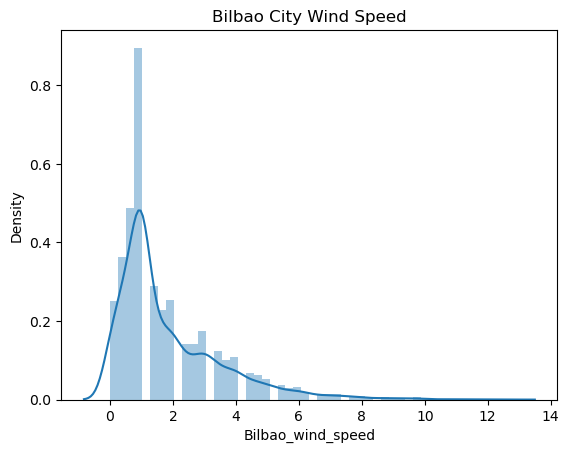

In [121]:
sns.distplot(df_train['Bilbao_wind_speed'])
plt.title('Bilbao City Wind Speed')
plt.show()

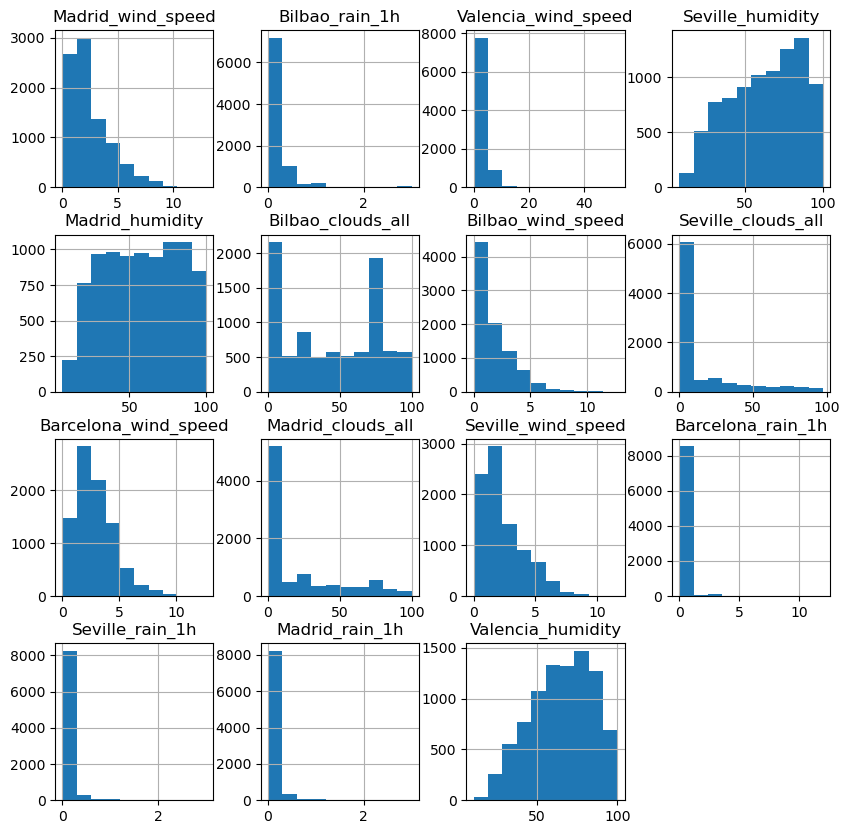

In [65]:
features = [col for col in df.columns if any(substring in col for substring in ['wind_speed', 'rain_1h', 'humidity', 'clouds_all'])] # create a list of all numerical features
df[features].hist(figsize=(10,10));

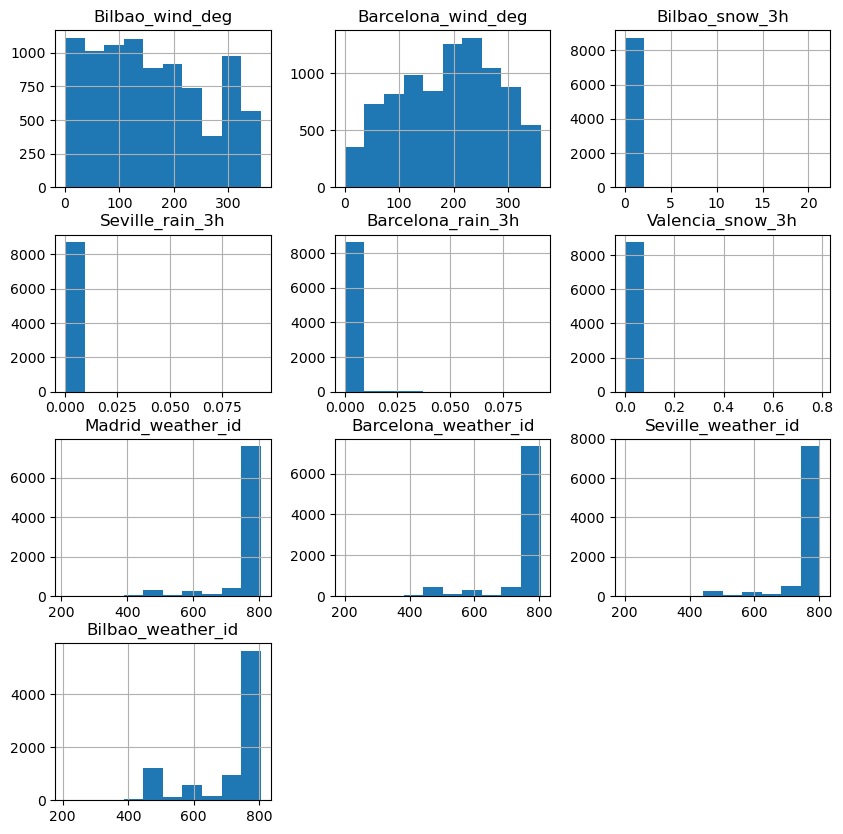

In [11]:
features = [col for col in df.columns if any(substring in col for substring in ['wind_deg', 'rain_3h', 'snow_3h', 'weather_id'])] # create a list of all numerical features
df[features].hist(figsize=(10,10));

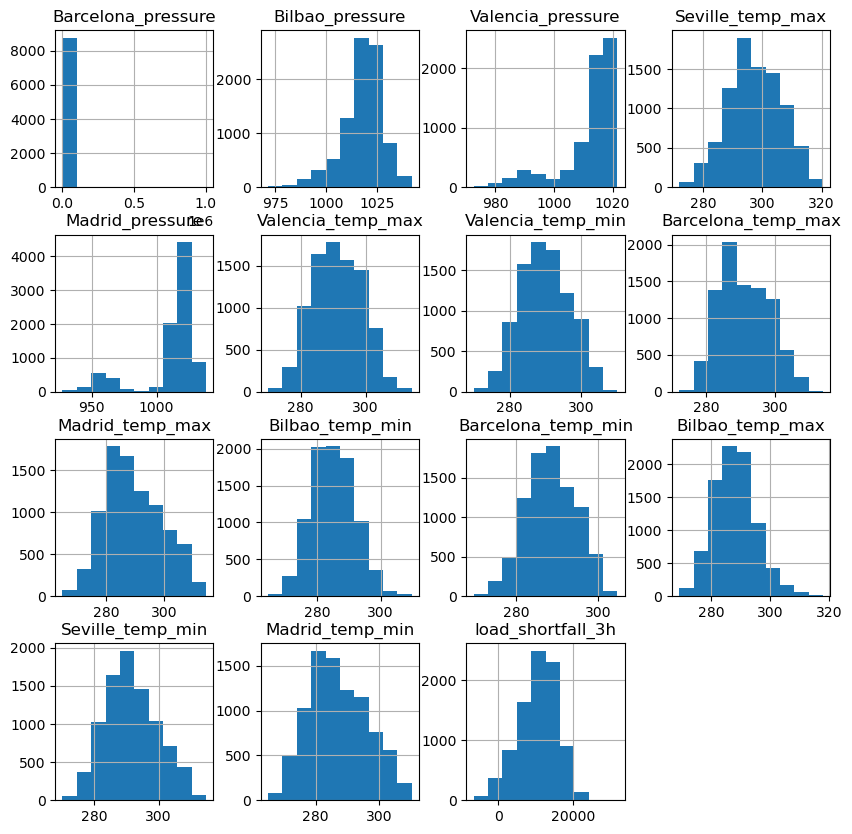

In [66]:
features = [col for col in df.columns if any(substring in col for substring in ['temp_min', 'temp_max', 'load_shortfall_3h', 'pressure'])] # create a list of all numerical features
df[features].hist(figsize=(10,10));

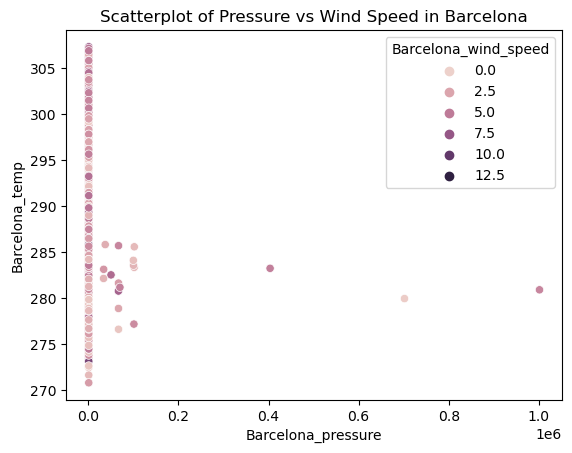

In [67]:
df.rename(columns={'Barcelona_temp': 'Barcelona_temp'}, inplace=True)
# Create a scatterplot
sns.scatterplot(x='Barcelona_pressure', y='Barcelona_temp', hue='Barcelona_wind_speed', data=df)

# Customize the plot
plt.title('Scatterplot of Pressure vs Wind Speed in Barcelona')
plt.xlabel('Barcelona_pressure')
plt.ylabel('Barcelona_temp')
plt.legend(title='Barcelona_wind_speed')
plt.show()

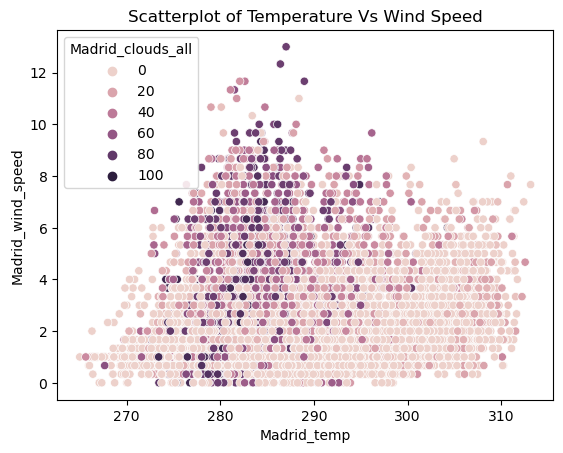

In [68]:
df.rename(columns={'Madrid_wind_speed': 'Madrid_wind_speed'}, inplace=True)
# Create a scatterplot
sns.scatterplot(x='Madrid_temp', y='Madrid_wind_speed', hue='Madrid_clouds_all', data=df)

# Customize the plot
plt.title('Scatterplot of Temperature Vs Wind Speed')
plt.xlabel('Madrid_temp')
plt.ylabel('Madrid_wind_speed')
plt.legend(title='Madrid_clouds_all')
plt.show()

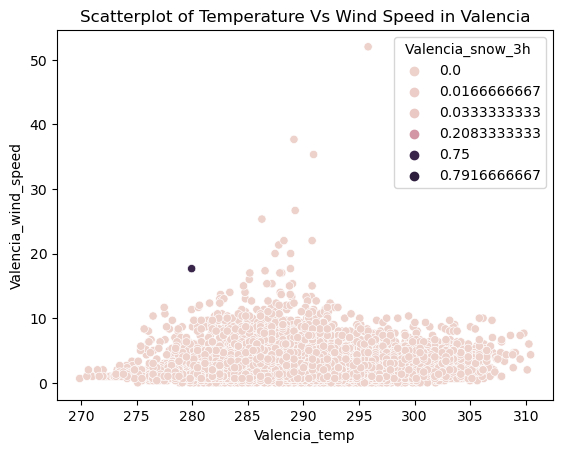

In [69]:
df.rename(columns={'Valencia_wind_speed': 'Valencia_wind_speed'}, inplace=True)
# Create a scatterplot
sns.scatterplot(x='Valencia_temp', y='Valencia_wind_speed', hue='Valencia_snow_3h', data=df)

# Customize the plot
plt.title('Scatterplot of Temperature Vs Wind Speed in Valencia')
plt.xlabel('Valencia_temp')
plt.ylabel('Valencia_wind_speed')
plt.legend(title='Valencia_snow_3h ')
plt.show()

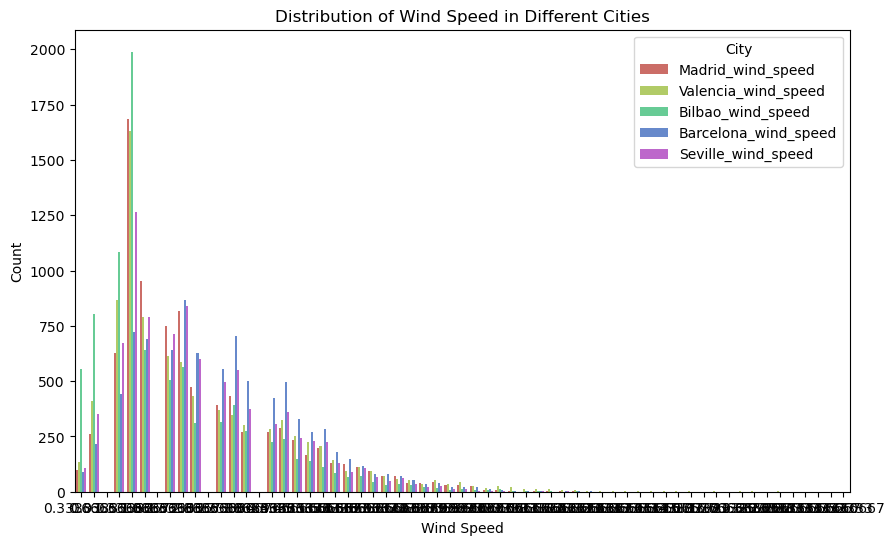

In [70]:
wind_speed_columns = [col for col in df.columns if 'wind_speed' in col]
df_wind_speed = df[wind_speed_columns]

# Melt the DataFrame to create a 'City' column and a 'Wind_Speed' column
df_melted = df_wind_speed.melt(var_name='City', value_name='Wind_Speed')

# Create a countplot to visualize the distribution of wind speeds in different cities
plt.figure(figsize=(10, 6))
sns.countplot(x='Wind_Speed', hue='City', data=df_melted, palette="hls")

# Customize the plot
plt.title("Distribution of Wind Speed in Different Cities")
plt.xlabel('Wind Speed')
plt.ylabel('Count')
plt.legend(title='City')
plt.show()

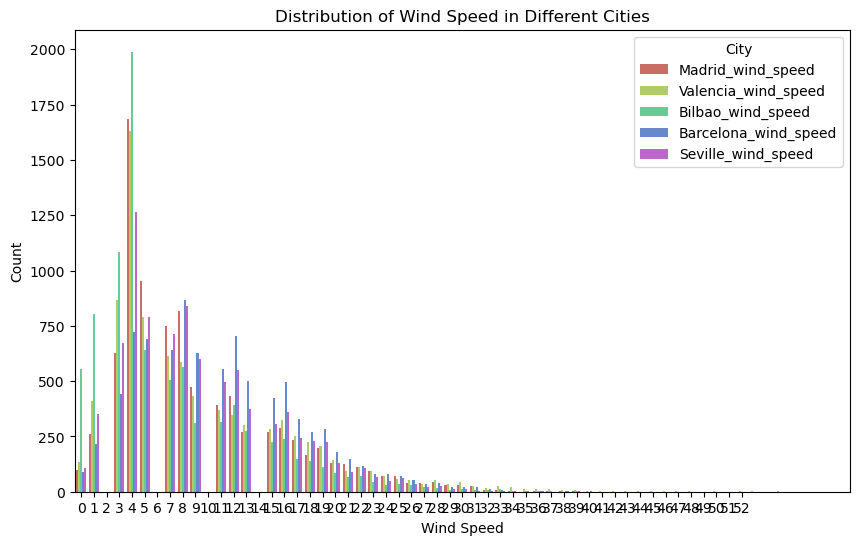

In [150]:


# Your code for extracting wind speed columns and melting the DataFrame remains unchanged

# Create a countplot to visualize the distribution of wind speeds in different cities
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Wind_Speed', hue='City', data=df_melted, palette="hls")

# Set x-axis ticks to integer values
ax.set_xticks(range(int(df_melted['Wind_Speed'].min()), int(df_melted['Wind_Speed'].max()) + 1))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

# Customize the plot
plt.title("Distribution of Wind Speed in Different Cities")
plt.xlabel('Wind Speed')
plt.ylabel('Count')
plt.legend(title='City')
plt.show()


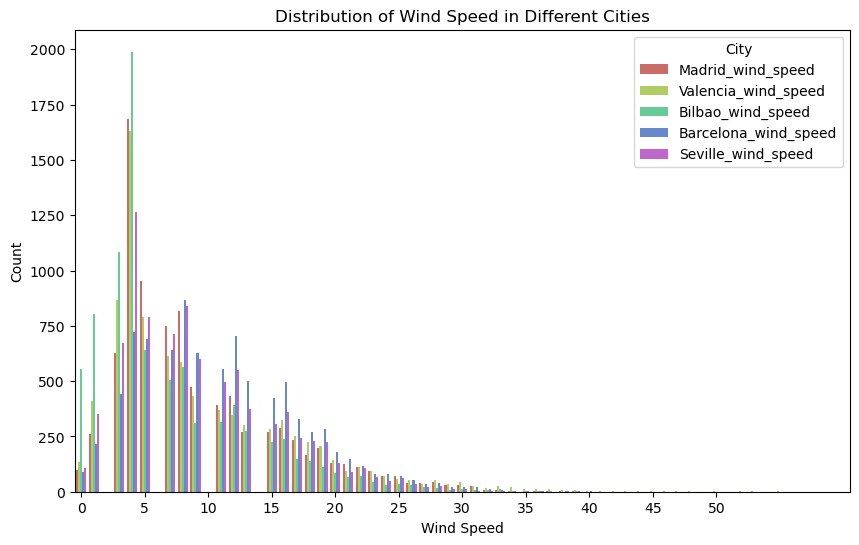

In [151]:

# Your code for extracting wind speed columns and melting the DataFrame remains unchanged

# Create a countplot to visualize the distribution of wind speeds in different cities
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Wind_Speed', hue='City', data=df_melted, palette="hls")

# Set x-axis ticks to integers in intervals of 5
tick_interval = 5
ax.set_xticks(range(int(df_melted['Wind_Speed'].min()), int(df_melted['Wind_Speed'].max()) + 1, tick_interval))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

# Customize the plot
plt.title("Distribution of Wind Speed in Different Cities")
plt.xlabel('Wind Speed')
plt.ylabel('Count')
plt.legend(title='City')
plt.show()


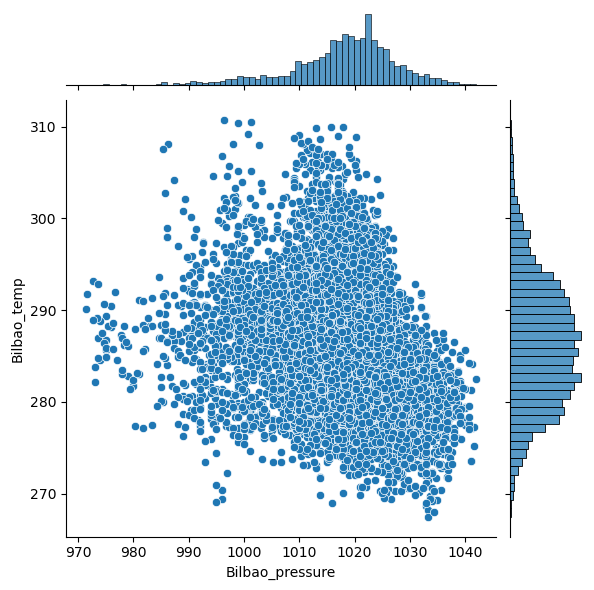

In [71]:
sns.jointplot(x = 'Bilbao_pressure', y = 'Bilbao_temp', data = df);



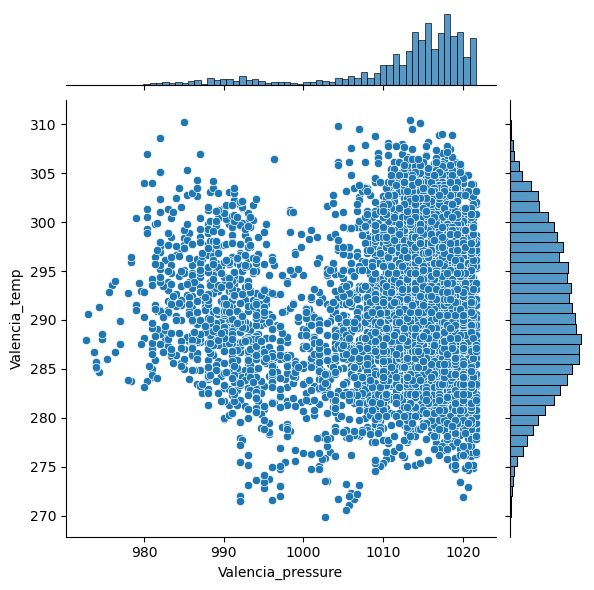

In [72]:
sns.jointplot(x = 'Valencia_pressure', y = 'Valencia_temp', data = df);

C:\Users\Hlongo Albinah\AppData\Local\Temp\ipykernel_37940\2901486096.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)


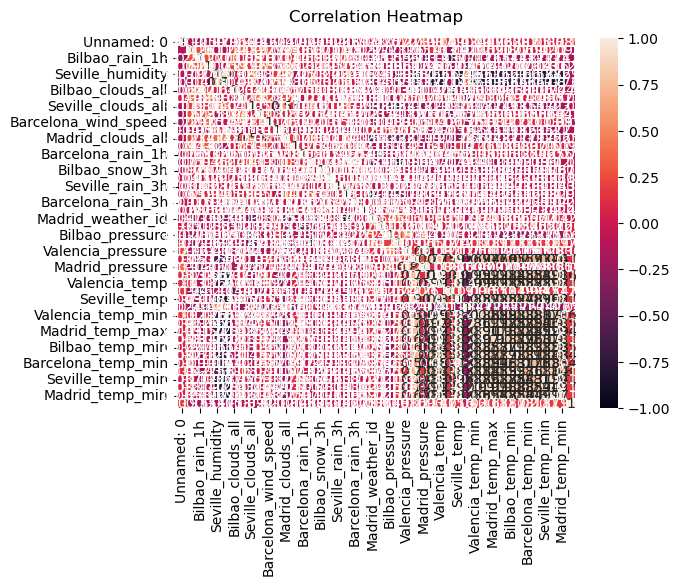

In [73]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [123]:
# evaluate correlation
# Getting a bigger view 
heatmap_corr=df_train_numerical.corr()
heatmap_corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
Unnamed: 0,1.000000,-0.235888,-0.171216,-0.229930,-0.012468,-0.032478,-0.192422,-0.136715,-0.089696,-0.135484,0.095843,0.166713,-0.029719,-0.145868,-0.020585,-0.046741,nan,0.301629,-0.000187,-0.090666,0.000708,nan,0.041953,0.028856,0.184644,0.082703,0.233345,0.271110,0.196598,0.222733,0.207437,0.186956,0.273018,0.272480,0.192403,0.248009,0.242473,0.248321,0.239508,0.262182,0.247846,0.289018,0.272777,0.241640,0.246385
Madrid_wind_speed,-0.235888,1.000000,0.253975,0.577509,-0.107176,-0.055267,0.164097,0.404369,0.166845,0.277087,0.203092,-0.044620,0.290741,0.420553,0.118758,0.124355,nan,-0.527713,0.012609,0.224845,0.010039,nan,-0.205462,-0.082191,-0.445457,-0.116220,-0.408045,-0.038384,-0.335964,0.030763,0.035666,-0.197850,-0.029730,-0.319646,0.040401,-0.034217,-0.024364,-0.028548,-0.029330,-0.041190,-0.022688,-0.056954,-0.023627,-0.023591,-0.046734
Bilbao_rain_1h,-0.171216,0.253975,1.000000,0.155717,0.103573,0.149643,0.414151,0.118086,0.080647,0.183078,0.030641,0.000205,0.188485,0.071920,0.134627,0.069728,nan,-0.292166,-0.008149,0.118811,0.022245,nan,-0.120980,-0.113650,-0.205045,-0.089323,-0.271538,-0.238806,-0.229570,-0.194648,-0.191332,-0.762097,-0.236915,-0.033854,-0.187942,-0.207383,-0.223619,-0.202221,-0.221014,-0.239588,-0.196089,-0.258778,-0.233939,-0.218465,-0.217309
Valencia_wind_speed,-0.229930,0.577509,0.155717,1.000000,-0.214738,-0.100565,0.126358,0.423967,0.080878,0.281658,0.409237,-0.008091,0.240487,0.280553,0.070692,0.054037,nan,-0.370779,-0.018665,0.109151,-0.006045,nan,-0.099254,-0.045271,-0.247379,-0.048185,-0.258368,0.021728,-0.164802,0.072974,0.075390,-0.103676,0.026945,-0.495787,0.077663,-0.003885,-0.004474,-0.001078,0.028977,0.015834,0.001775,-0.003910,0.030320,-0.006542,-0.033857
Seville_humidity,-0.012468,-0.107176,0.103573,-0.214738,1.000000,0.771534,0.033669,-0.172222,0.388829,-0.233416,-0.182931,0.212338,0.272806,-0.244655,0.070347,0.236841,nan,-0.070909,0.008871,0.098910,-0.023903,nan,-0.169767,-0.060415,-0.179860,-0.329678,-0.148450,-0.756395,-0.082909,-0.623489,-0.623704,-0.137954,-0.749199,0.459746,-0.623296,-0.587597,-0.668035,-0.587903,-0.562529,-0.547807,-0.585128,-0.514154,-0.743369,-0.658135,-0.630085
Madrid_humidity,-0.032478,-0.055267,0.149643,-0.100565,0.771534,1.000000,0.005968,-0.043188,0.327895,-0.169288,-0.057157,0.223869,0.525499,-0.135591,0.117499,0.199270,nan,-0.065996,0.000784,0.229901,-0.021271,nan,-0.349022,-0.103705,-0.239304,-0.273442,-0.222737,-0.745308,-0.094984,-0.708881,-0.710969,-0.164793,-0.743359,0.409074,-0.712309,-0.673470,-0.789474,-0.672803,-0.607507,-0.588370,-0.668369,-0.548738,-0.740434,-0.777081,-0.756214
Bilbao_clouds_all,-0.192422,0.164097,0.414151,0.126358,0.033669,0.005968,1.000000,0.001085,0.010232,0.227288,0.036946,-0.030848,0.034425,0.026322,0.112632,-0.001283,nan,-0.224310,0.012131,0.057843,0.002251,nan,-0.056189,-0.112166,0.011598,-0.016618,-0.171009,-0.134453,-0.143983,-0.060637,-0.057513,-0.495943,-0.134444,-0.084185,-0.054462,-0.075326,-0.102398,-0.071588,-0.128791,-0.167230,-0.067711,-0.215278,-0.132752,-0.104385,-0.108140
Bilbao_wind_speed,-0.136715,0.404369,0.118086,0.423967,-0.172222,-0.043188,0.001085,1.000000,0.138443,0.519614,0.302084,0.004768,0.221904,0.276280,-0.005558,0.101971,nan,-0.274803,-0.

In [74]:
df.corr()

C:\Users\Hlongo Albinah\AppData\Local\Temp\ipykernel_37940\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,...,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,-0.140583,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,-0.155738,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800


In [ ]:
# have a look at feature distributions

C:\Users\Hlongo Albinah\AppData\Local\Temp\ipykernel_37940\4152808537.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)


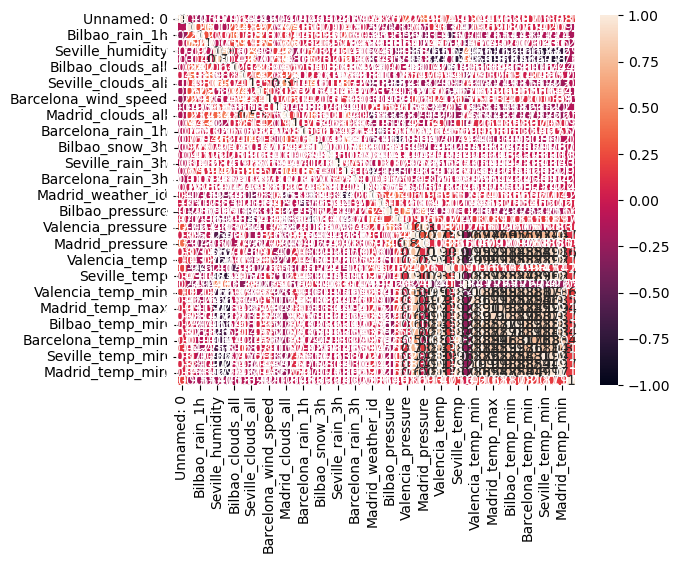

In [75]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

In [124]:
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

C:\Users\Hlongo Albinah\AppData\Local\Temp\ipykernel_37940\3295441973.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Barcelona_wind_speed'])


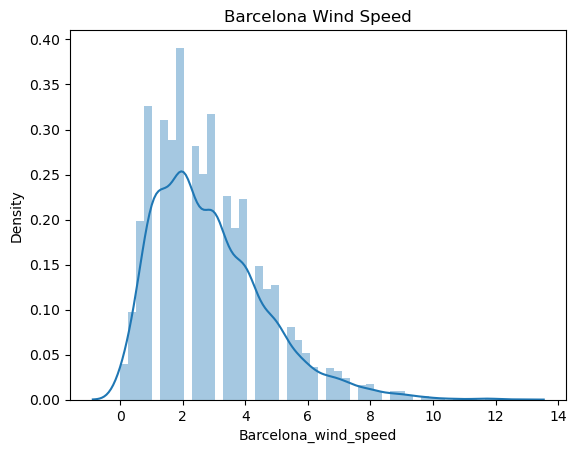

In [127]:
sns.distplot(df_train['Barcelona_wind_speed'])
plt.title('Barcelona Wind Speed')
plt.show()

<Figure size 1400x500 with 0 Axes>

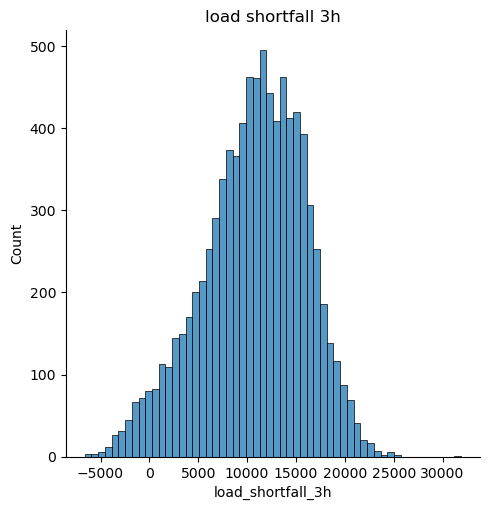

In [135]:
# Distribution of train data target variable
from matplotlib.pyplot import figure
figure(figsize=(14, 5), dpi=100)
sns.displot(df_train['load_shortfall_3h'])
plt.title('load shortfall 3h')
plt.show()

C:\Users\Hlongo Albinah\AppData\Local\Temp\ipykernel_37940\3202405600.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Madrid_clouds_all'])


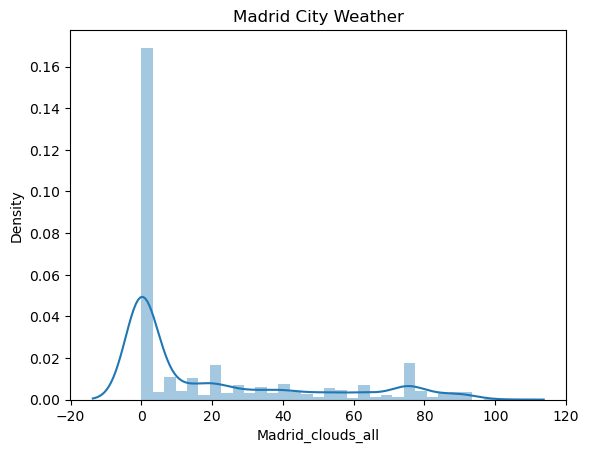

In [137]:
sns.distplot(df_train['Madrid_clouds_all'])
plt.title('Madrid City Weather')
plt.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [143]:
#Creating temporary timescales
df_train['time'] = pd.to_datetime(df_train.time)
df_train['Year'] = df_train[['time']].applymap(lambda dt:dt.year
 if not pd.isnull(dt.year) else 0)
df_train['Month'] = df_train[['time']].applymap(lambda dt:dt.month
 if not pd.isnull(dt.month) else 0)
df_train['Day'] = df_train[['time']].applymap(lambda dt:dt.day_name()
 if not pd.isnull(dt.day_name()) else 0)
df_train['Hours'] = df_train[['time']].applymap(lambda dt:dt.hour
 if not pd.isnull(dt.day_name()) else 0)

# Harvesting unique features in the train data
cloud =[]
temp= []
speed= []
rain= []
for col in df_num_train.columns:
    if "cloud" in col:
        cloud.append(col)
for col in df_train.columns:
    if col[-1]=="p" in col:
        temp.append(col)
for i in cloud:
    temp.append(i)
for col in df_train.columns:
    if "speed" in col:
        speed.append(col)
for col in df_train.columns:
    if "rain_3h" in col:
        rain.append(col)

df_train[speed].head()

,Madrid_wind_speed,Valencia_wind_speed,Bilbao_wind_speed,Barcelona_wind_speed,Seville_wind_speed,Madrid_mean_wind_speed,Valencia_mean_wind_speed,Seville_mean_wind_speed,average_wind_speed
0,0.666667,0.666667,1.000000,6.333333,3.333333,2.425729,2.586272,2.425045,1.555556
1,0.333333,1.666667,1.000000,4.000000,3.333333,2.425729,2.586272,2.425045,1.777778
2,1.000000,1.000000,1.000000,2.000000,2.666667,2.425729,2.586272,2.425045,1.555556
3,1.000000,1.000000,1.000000,2.333333,4.000000,2.425729,2.586272,2.425045,2.000000
4,1.000000,1.000000,0.333333,4.333333,3.000000,2.425729,2.586272,2.425045,1.666667


In [148]:
speed= []
for col in df_train.columns:
    if "speed" in col:
        speed.append(col)
speed.append("Year")
speed.append("Month")
speed.append("load_shortfall_3h")
for i in temp:
    speed.append(i)
groupsp = df_train[[*speed, "Year", "Month"]].groupby(["Year", "Month"], as_index=False).mean()
groupsp["total speed"]= (groupsp["Madrid_wind_speed"]+groupsp["Valencia_wind_speed"]+groupsp["Bilbao_wind_speed"])/5
groupsp["total temp"]=( groupsp["Valencia_temp"]+groupsp["Seville_temp"]+groupsp["Barcelona_temp"]+groupsp["Bilbao_temp"]
                     +groupsp["Madrid_temp"])/5

groupsp.tail(1)

ValueError: Grouper for 'Year' not 1-dimensional

In [145]:
temp= []
for col in df_train.columns:
    if col[-1]=="p" in col:
        temp.append(col)
temp.append("Year")
temp.append("Month")
temp.append("load_shortfall_3h")
for i in cloud:
    temp.append(i)
groupsp= df_train[temp].groupby(["Year", "Month"], as_index= False).mean()
groupsp["total temp"]=( groupsp["Valencia_temp"]+groupsp["Seville_temp"]+groupsp["Barcelona_temp"]+groupsp["Bilbao_temp"]
                     +groupsp["Madrid_temp"])/5
groupsp["total cloud"]= (groupsp["Bilbao_clouds_all"]+groupsp["Seville_clouds_all"]+groupsp["Madrid_clouds_all"])/3
groupsp.tail(1)

,Year,Month,Valencia_temp,Seville_temp,Barcelona_temp,Bilbao_temp,Madrid_temp,load_shortfall_3h,Bilbao_clouds_all,Seville_clouds_all,Madrid_clouds_all,total temp,total cloud
35,2017,12,283.713895,283.420023,281.514933,280.072594,278.887647,10041.087366,54.913978,16.775538,24.333333,281.521818,32.007616


In [ ]:
# remove missing values/ features

KeyError: 'Bilbao_clouds_all'

In [77]:
# Ensure your 'time' column is in datetime format
df['time'] = pd.to_datetime(df['time'])

In [78]:
# city-specific features (e.g., mean, max, min) for relevant weather variables
cities = ['Madrid', 'Valencia', 'Seville',]  # List of cities in your dataset

In [90]:
# Ensure your 'time' column is in datetime format
df['time'] = pd.to_datetime(df['time'])

# city-specific features (e.g., mean, max, min) for relevant weather variables
cities = ['Madrid', 'Valencia', 'Seville',]  # List of cities in your dataset

for city in cities:
    # mean wind speed for each city
    df[f'{city}_mean_wind_speed'] = df[f'{city}_wind_speed'].mean()
   
    # maximum temperature for each city
    df[f'{city}_max_temperature'] = df[f'{city}_temp'].max()
   
    # minimum humidity for each city
    df[f'{city}_min_humidity'] = df[f'{city}_humidity'].min()

# aggregated weather statistics for all cities
# You can use functions like mean, max, min, std, etc., as needed
df['average_wind_speed'] = df[[f'{city}_wind_speed' for city in cities]].mean(axis=1)
df['max_temperature'] = df[[f'{city}_temp' for city in cities]].max(axis=1)
df['min_humidity'] = df[[f'{city}_humidity' for city in cities]].min(axis=1)

df.to_csv('df_train.csv', index=False)


In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [154]:
# create targets and features dataset
# remove missing values/ features

# Check for the number of null values in the 'Valencia_pressure' column
null_count = df['Valencia_pressure'].isnull().sum()

if null_count == 2068:
    # Drop the 'Valencia_pressure' column if it has 2068 null values
    df.drop(columns=['Valencia_pressure'], inplace=True)
    print("Column 'Valencia_pressure' with 2068 null values has been removed.")
else:
    print("The number of null values in 'Valencia_pressure' does not match the expected count.")

# Save

Column 'Valencia_pressure' with 2068 null values has been removed.


In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic